# Exercise 5 - IART - Supervised Learning

### Adapted from Notebook by [Randal S. Olson](http://www.randalolson.com/), supported by [Jason H. Moore](http://www.epistasis.org/)
#### [University of Pennsylvania Institute for Bioinformatics](http://upibi.org/)

## 5.1 Software/Library Installation 
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including neural networks, support vector machines, random forests, gradient boosting, k-means and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Start by installing Python, Anaconda, Jupyter Labs, NumPy, SciPy, Pandas, Scikit-Learn, MatPlotLib and Seaborn. In fact, it is only needed to install Anaconda that contain all the others following the link: https://www.anaconda.com/products/individual 
Information about the rest of the packages/libraries may be found at: 

•	Python Website, https://www.python.org/   
•	Anaconda Website, https://www.anaconda.com/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  
•	Imbalanced-Learn Website,https://imbalanced-learn.org/


After installing all the libraries, please continue with this example Notebook that contains an example code containing several exercises.

Importing the dataset


### 2. Extended Steel Plate Defect data set – Data Preprocessing and Simple Classification
The original Steel Plate Defect data set is a multivariate data set provided by the Semeion institute, in Italy. The data set studied in this notebook is an extension of that data set, with 1940 new rows, provided by the UC Irvine Machine Learning Repository.

The data set consists of samples of multiple steel plates, with multiple features describing the properties of the defect, such as its position and area. In this assignment, we will use supervised learning machine learning algorithms to analyze the dataset and train a model capable of classifying the defects.

In [125]:
import pandas

steel_data = pandas.read_csv('extended_steel_train.csv')
pandas.set_option('display.max_columns', None)  # or 1000
pandas.set_option('display.max_rows', None)  # or 1000
steel_data.head()
steel_data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
count,21159.000000,21159.000000,2.115900e+04,2.115900e+04,21159.000000,21159.000000,21159.000000,2.115900e+04,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000
mean,697.161019,741.424878,1.831569e+06,1.828712e+06,1703.308710,97.144525,65.853490,1.931816e+05,84.785009,128.790207,1459.322511,0.402429,0.596673,76.444539,0.351007,0.409766,0.574195,0.030863,0.614369,0.829976,0.590397,2.475212,1.314798,1.390966,0.100924,-0.137725,0.573142,0.076705,0.063330,0.180680,0.030247,0.025521,0.244104,0.341746
std,532.048083,501.149392,1.892936e+06,1.886280e+06,3884.880106,192.513769,161.191305,4.489439e+05,29.121968,14.672587,145.469705,0.490399,0.490577,54.043713,0.317311,0.125406,0.260511,0.048494,0.224388,0.222278,0.482092,0.763238,0.469165,0.410280,0.488912,0.123236,0.332911,0.266129,0.243561,0.384762,0.171271,0.157705,0.429565,0.474306
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,214.000000,6.394900e+05,6.395070e+05,88.000000,15.000000,14.000000,9.778000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.059100,0.317500,0.375000,0.006600,0.450000,0.650000,0.000000,1.944500,1.000000,1.079200,-0.272700,-0.192600,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,754.000000,772.000000,1.378585e+06,1.378465e+06,169.000000,25.000000,24.000000,1.840200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.237100,0.413300,0.545400,0.009500,0.636400,0.961500,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1145.000000,1161.000000,2.339627e+06,2.336588e+06,659.000000,67.000000,62.000000,6.841600e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.648800,0.495200,0.818200,0.019200,0.785700,1.000000,1.000000,2.818900,1.431400,1.716000,0.526300,-0.082800,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, there are 21 rows that indicate more than one type of defect. This could be troublesome for labeling the rows.

However, when printing out these rows, we can see that most of them are K_Srcatch and Other_Faults, and all of them involve K_Srcatch.

In [126]:
all_target_labels = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
target_values = steel_data[all_target_labels]

target_values.sum(axis=1).value_counts()
filtered_by_2 = steel_data[target_values.sum(axis=1) >= 2]
print(filtered_by_2);

       X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
634           41        192    1682722    1682891          9927          578   
752           39        194    2134009    2134076         10904          562   
3572         241        360     938265     938349          2027          178   
4416          39        729     498078     498335         13114          976   
4530          39        222     221142    2212144         10166          634   
4664          39        218       7430       7458         21321          758   
6448          41        192      92878      92896         11211          572   
7589          41        776     844714     844903         11711          822   
8075          41        193    1725027    1725163         10941          639   
8538          39        215    1512277    1512467         13033          709   
9103          41        212    1593597    1563703         12629          795   
9388          41        205    1495267  

#### Data processing
- Firstly, although this has no impact on results, we fixed an apparent typo in one of the target rows, which was labeled 'K_Scatch' instead of 'K_Scratch'.
- We merged the target columns into a single column used for labeling, called 'Faults'.
- Taking into account our previous observations, we collapsed the defects of rows containing more than one defect into K_Scratch.

In [127]:
#print(target_values.head(20))
#Func to merge the columns that have a certain fault set to 1 and concatenate them by ',' returning them to a new column.
import numpy as np
def get_faults(row):
    faults = "No_Faults"
    counter = 0
    for label in all_target_labels:
        if row[label] == 1:
            counter += 1
            faults = label 
    return faults if counter < 2 else "K_Scratch"
def get_steel_type(row):
    if row['TypeOfSteel_A300'] == 1:
        return 'A300'
    else:
        return 'A400'
###steel_data['Fault_count'] = steel_data[all_target_labels].sum(axis=1)
##steel_data = steel_data[steel_data['Fault_count'] < 2]
##steel_data.drop(columns='Fault_count', inplace=True)

## steel_data = steel_data[steel_data['Other_Faults'] == 0] #drops the rows with Other_Faults set to 1
steel_data = steel_data[(steel_data[all_target_labels] == 1).any(axis=1)]
steel_data['Faults']=target_values.apply(get_faults, axis=1)
target = steel_data['Faults']

#print(steel_data[steel_data['Faults'].str.contains(',')])
#Merge steel type columns (not needed?)
#labels = ['TypeOfSteel_A300','TypeOfSteel_A400']
#target = steel_data[labels]
#steel_data['TypeOfSteel'] = target.apply(get_steel_type, axis=1)
#print(steel_data['TypeOfSteel'].head(20))
#steel_data = steel_data.drop(['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'],axis=1))

#### Visualization of the dataset
As we can see, they are really overlapped, specially "Bumps" and "Other_Faults", they are similar in almost every aspect and feature.

In [128]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb


location_features = ['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Faults']
size_features = ['Pixels_Areas','X_Perimeter','Y_Perimeter','Faults']
luminosity_features = ['Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Faults']
material_features = ['Steel_Plate_Thickness','Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index','Faults']
logaritmit_features = ['LogOfAreas','Log_X_Index', 'Log_Y_Index','Faults']
statistical_features = ['Orientation_Index','Luminosity_Index','SigmoidOfAreas','Faults']
print("Bumps entries: ")
print(steel_data[steel_data['Faults'].str.contains('Bumps')]['Faults'].count())
print("Dirtiness entries: ")
print(steel_data[steel_data['Faults'].str.contains('Dirtiness')]['Faults'].count())
print("K_Scratch entries: ")
print(steel_data[steel_data['Faults'].str.contains('K_Scratch')]['Faults'].count())
print("Other_Faults entries: ")
print(steel_data[steel_data['Faults'].str.contains('Other_Faults')]['Faults'].count())
print("Pastry entries: ")
print(steel_data[steel_data['Faults'].str.contains('Pastry')]['Faults'].count())
print("Stains entries: ")
print(steel_data[steel_data['Faults'].str.contains('Stains')]['Faults'].count())
print("Z_Scratch entries: ")
print(steel_data[steel_data['Faults'].str.contains('Z_Scratch')]['Faults'].count())
"""sb.pairplot(steel_data[location_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[size_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[luminosity_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[material_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[logaritmit_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[statistical_features],hue='Faults')
plt.show()"""



Bumps entries: 
5163
Dirtiness entries: 
540
K_Scratch entries: 
3823
Other_Faults entries: 
7213
Pastry entries: 
1622
Stains entries: 
640
Z_Scratch entries: 
1340


"sb.pairplot(steel_data[location_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[size_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[luminosity_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[material_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[logaritmit_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[statistical_features],hue='Faults')\nplt.show()"

#### Classification section

In this following cell, we prepared the features and the data we wanted to classify:

In [129]:
#iris_data_clean = pandas.read_csv('iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
#all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values
features = ['X_Minimum', 'X_Maximum', 'Pixels_Areas',
               'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
               'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
               'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
               'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
               'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
               'Log_X_Index', 'Log_Y_Index', 'Orientation_Index',
               'SigmoidOfAreas']
steel_inputs = steel_data[features].values

# Similarly, we can extract the class labels
#all_labels = iris_data_clean['class'].values
steel_labels = steel_data['Faults'].values
# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]


#### Splitting and sampling the dataset
Now our data is ready to be split and sampled.
Firstly we'll sample the usual way:

In [130]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(steel_inputs, steel_labels, test_size=0.75, random_state=1)

Then, as we have the class imbalance problem in this dataset, we'll sample using SMOTE in order to select a subset that's more balanced:

In [131]:
from imblearn.over_sampling import SMOTE

(training_inputs_stratified,
 testing_inputs_stratified,
 training_classes_stratified,
 testing_classes_stratified) = train_test_split(steel_inputs, steel_labels,stratify=steel_labels, test_size=0.75, random_state=1)

smote = SMOTE(random_state=1)
training_inputs_op, training_classes_op = smote.fit_resample(training_inputs_stratified, training_classes_stratified)

##### The first model that we used was the **DecisionTree**
After training the model and evaluating its performance:

0.49986890403775563
              precision    recall  f1-score   support

       Bumps       0.44      0.42      0.43      3879
   Dirtiness       0.20      0.24      0.22       392
   K_Scratch       0.84      0.83      0.84      2877
Other_Faults       0.45      0.44      0.45      5422
      Pastry       0.25      0.28      0.27      1221
      Stains       0.65      0.66      0.65       462
   Z_Scratch       0.43      0.47      0.45      1003

    accuracy                           0.50     15256
   macro avg       0.47      0.48      0.47     15256
weighted avg       0.50      0.50      0.50     15256



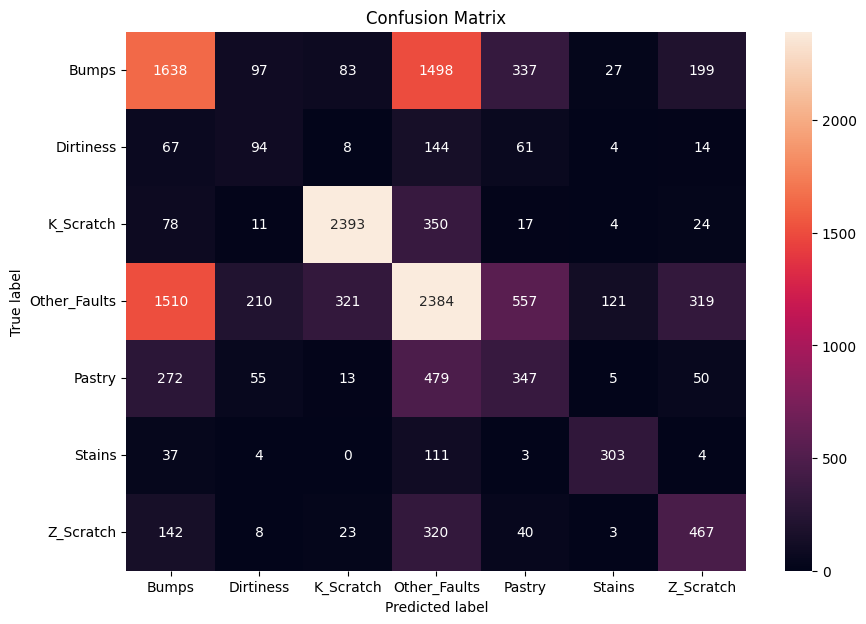

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report


# Create the classifier
# Your Code Here
decisionTree = DecisionTreeClassifier()

# Train the classifier on the training set
# Your Code Here
decisionTree.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
# Your Code Here
score = decisionTree.score(testing_inputs, testing_classes)
print(score)
class_pred = decisionTree.predict(testing_inputs)
cm = confusion_matrix(testing_classes, class_pred)
class_labels = np.unique(testing_classes)

report = classification_report(testing_classes, class_pred, target_names=class_labels)
print(report)
# Create a DataFrame from the confusion matrix for easier plotting
cm_df = pandas.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The model achieves a poor 49% of classification accuracy because "Bumps" and "Other_Faults" are often confused by the model, just like we infered previously with other plotted graphs.
So we tested using feature engineering for many new features we tried to create to distinguish those:


In [133]:
def calculate_area(steel_data):
    x_range = steel_data['X_Maximum'] - steel_data['X_Minimum']
    y_range = steel_data['Y_Maximum'] - steel_data['Y_Minimum']  
    steel_data["XY_Area"] = x_range * y_range
    return steel_data

def calculate_range_XY(steel_data):
    steel_data["X_Range"] = abs(steel_data['X_Maximum'] - steel_data['X_Minimum'])
    steel_data["Y_Range"] = abs(steel_data['Y_Maximum'] - steel_data['Y_Minimum'])  
    return steel_data
def calculate_Size_Ratio(steel_data):
    steel_data["Size_Ratio"] = steel_data['Pixels_Areas'] / (steel_data['X_Perimeter'] + steel_data['Y_Perimeter'])
    return steel_data
def calculate_luminosity_range_feature(data):
    data['Luminosity_Range'] = (data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity'])
    return data


data1=calculate_range_XY(steel_data)

data2=calculate_area(steel_data)

data3=calculate_Size_Ratio(steel_data)

data4=calculate_luminosity_range_feature(steel_data)

data5=calculate_range_XY(steel_data)
data5=calculate_Size_Ratio(steel_data)
data5=calculate_luminosity_range_feature(steel_data)

datas = [data1,data2,data3,data4,data5]
new_features = ['X_Range','Y_Range','Size_Ratio','XY_Area','Luminosity_Range']
res_features = features + new_features

for data in datas:
    
    values = data[res_features].values
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(values, steel_labels, test_size=0.75, random_state=1)
    decisionTree.fit(training_inputs, training_classes)
    score = decisionTree.score(testing_inputs, testing_classes)
    print(score)


0.49770582066072366
0.49901678028316726
0.49737808075511275
0.502884111169376
0.49901678028316726


The result wasn't very satisfactory after the new features.

##### We tried to use GridSearch to look for the best score according to the defined parameters in the bellow code:

In [134]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(1, 10),
                  'max_features': range(1, len(features)),}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(steel_inputs, steel_labels)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 24),
                         'splitter': ['best', 'random']})

In [135]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.5910235819085377
Best parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 22, 'splitter': 'best'}


##### We then used the parameters to do the DecisionTree classification

In [136]:
temp_decision_tree_classifier = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],max_depth=grid_search.best_params_['max_depth'],max_features=grid_search.best_params_['max_features'],splitter=grid_search.best_params_['splitter'])
temp_decision_tree_classifier.fit(training_inputs, training_classes)
score = temp_decision_tree_classifier.score(testing_inputs, testing_classes)
print(score)
class_pred = temp_decision_tree_classifier.predict(testing_inputs)
classification_rep = classification_report(testing_classes, class_pred, target_names=class_labels)
print(classification_rep)



0.5636470896696382
              precision    recall  f1-score   support

       Bumps       0.47      0.52      0.49      3879
   Dirtiness       0.32      0.19      0.24       392
   K_Scratch       0.90      0.87      0.89      2877
Other_Faults       0.48      0.55      0.51      5422
      Pastry       0.37      0.16      0.23      1221
      Stains       0.74      0.74      0.74       462
   Z_Scratch       0.61      0.49      0.54      1003

    accuracy                           0.56     15256
   macro avg       0.56      0.50      0.52     15256
weighted avg       0.56      0.56      0.56     15256



##### We also checked the correlation between the attribues and the class:

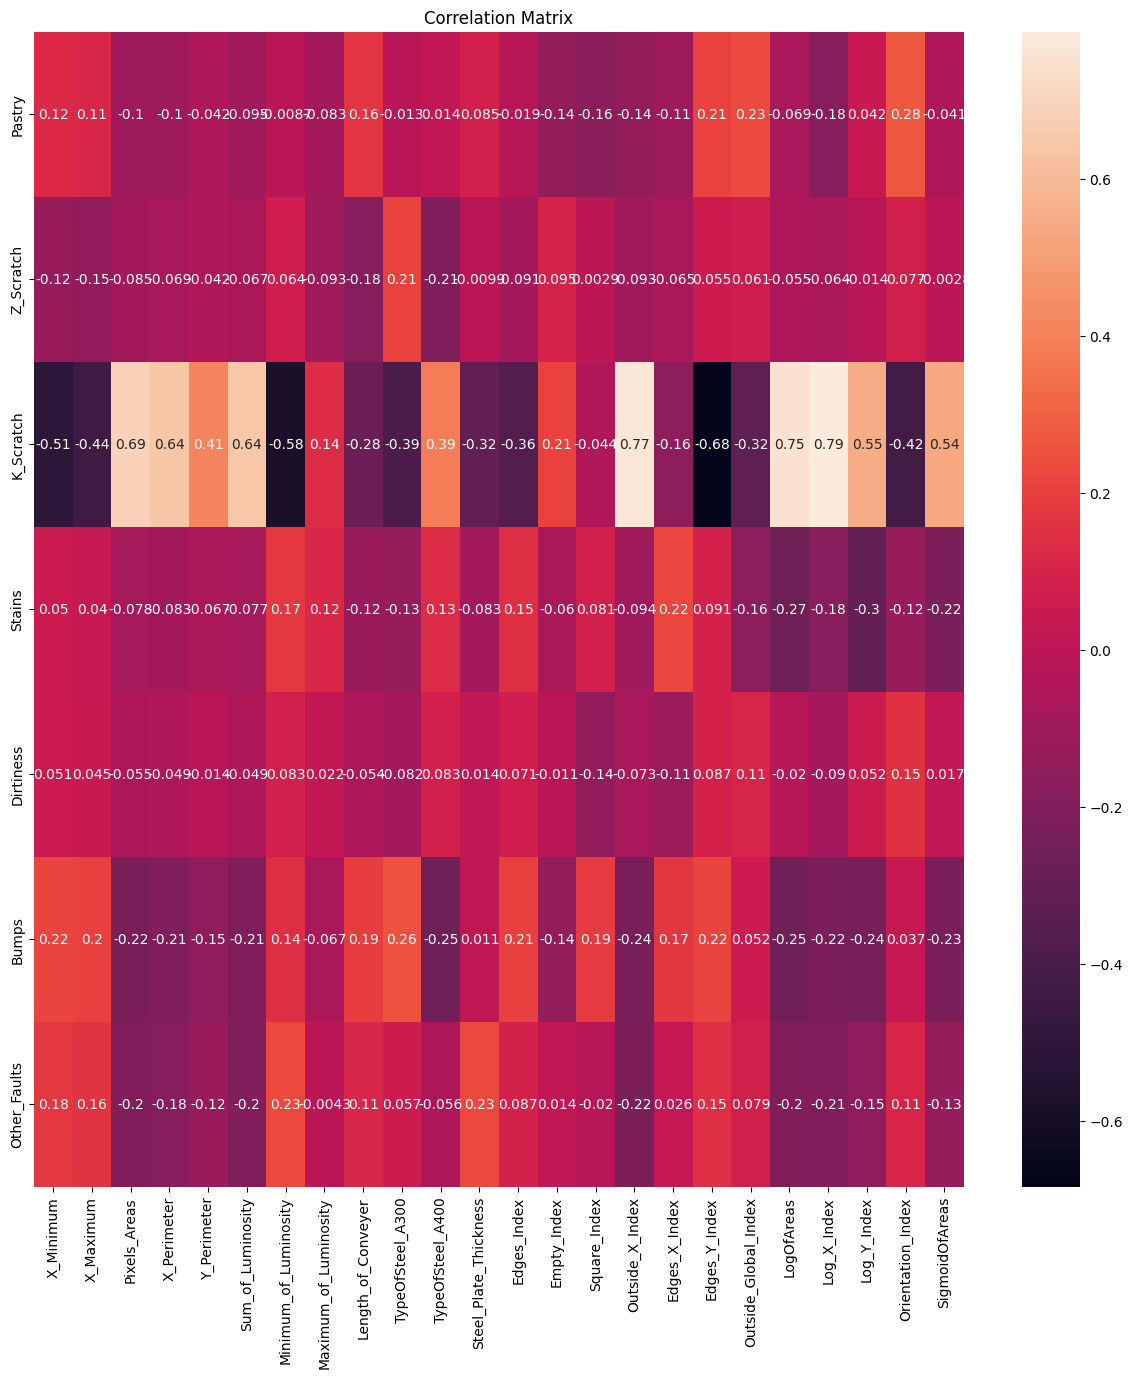

In [137]:
selected_data=steel_data[features+all_target_labels]
correlation_matrix = selected_data.corr()
correlation_matrix = correlation_matrix.loc[all_target_labels, features]


# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

The results shown give us the idea that most of these attributes benefit the "K-Scratch" entries more because they are more correlated, whereas the other entries have little to none correlation to the features we selected for the model.

#### Using the balanced subset (SMOTE) with **DecisionTree**

The major problem was that the classes weren't balanced enough because they differ much in size, plus the fact that the correlations to the features are low for the majority of the classes so the models can't identify the classes accurately.
To solve this issue, we imported **imbalaced-learn** for datasets that are imbalaced such our case, and we used SMOTE in order to create a balanced subset of our dataset previously.

(array([3., 5., 5., 5., 9., 6., 7., 7., 2., 1.]),
 array([0.50275265, 0.50399135, 0.50523004, 0.50646874, 0.50770743,
        0.50894613, 0.51018482, 0.51142352, 0.51266221, 0.5139009 ,
        0.5151396 ]),
 <BarContainer object of 10 artists>)

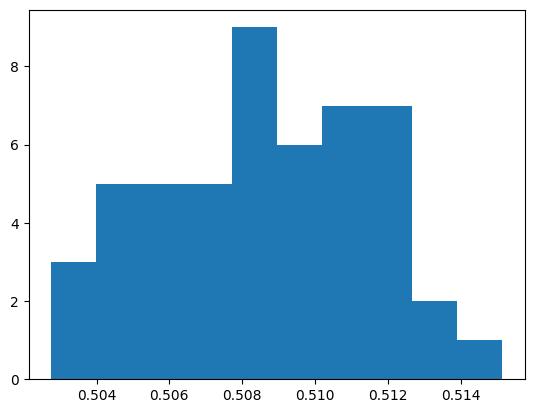

In [138]:
model_accuracies = []

for repetition in range(50):
    (training_inputs_str,
     testing_inputs_str,
     training_classes_str,
     testing_classes_str) = train_test_split(steel_inputs, steel_labels,stratify=steel_labels, test_size=0.25, random_state=1)
    training_inputs_optimized, training_classes_optimized = smote.fit_resample(training_inputs_str, training_classes_str)
    decisionTree.fit(training_inputs_optimized, training_classes_optimized)
    model_accuracies.append(decisionTree.score(testing_inputs_str, testing_classes_str))
    

plt.hist(model_accuracies)

#### We tried to implement another model for this problem, **K-NN**:

0.4904955427372837
              precision    recall  f1-score   support

       Bumps       0.36      0.40      0.38      3879
   Dirtiness       0.12      0.01      0.02       392
   K_Scratch       0.83      0.87      0.85      2877
Other_Faults       0.43      0.54      0.48      5422
      Pastry       0.05      0.00      0.00      1221
      Stains       0.62      0.74      0.68       462
   Z_Scratch       0.35      0.12      0.18      1003

    accuracy                           0.49     15256
   macro avg       0.39      0.38      0.37     15256
weighted avg       0.45      0.49      0.46     15256



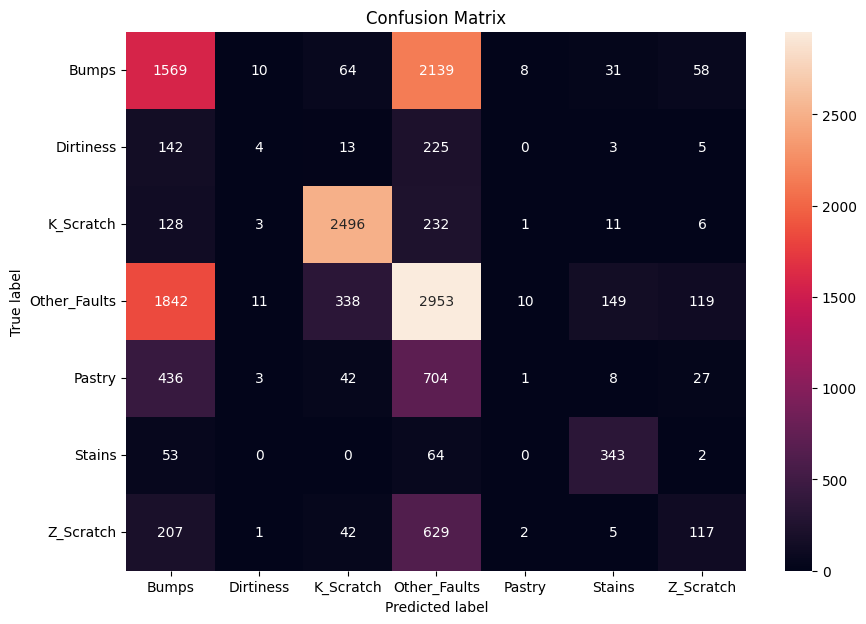

In [139]:
from sklearn.neighbors import KNeighborsClassifier

steel_inputs= steel_data[features].values
steel_labels = steel_data['Faults'].values
(training_inputs,
    testing_inputs,
    training_classes,
    testing_classes)= train_test_split(steel_inputs, steel_labels, test_size=0.75, random_state=1)
k=20
prev_score = 0
"""for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(training_inputs, training_classes)
    score = knn.score(testing_inputs, testing_classes)"""

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(training_inputs, training_classes)
class_pred = knn.predict(testing_inputs)
score = knn.score(testing_inputs, testing_classes)
report = classification_report(testing_classes, class_pred, target_names=class_labels)
print(score)
print(report)
cm = confusion_matrix(testing_classes, class_pred)
class_labels=np.unique(testing_classes)
# Create a DataFrame from the confusion matrix for easier plotting
cm_df = pandas.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


#### Using the balanced subset (SMOTE) with **K-NN**

In [140]:
k_max = 0;
temp = 0;
y_pred = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_inputs_op, training_classes_op)
    temp_y_pred = knn.predict(testing_inputs)
    score = knn.score(testing_inputs, testing_classes)
    if(score > temp):
        temp = score
        k_max = k
        y_pred = temp_y_pred
print(k_max)
print(temp)
print(classification_report(testing_classes, y_pred))

1
0.5553880440482433
              precision    recall  f1-score   support

       Bumps       0.55      0.48      0.52      3879
   Dirtiness       0.15      0.38      0.22       392
   K_Scratch       0.86      0.85      0.86      2877
Other_Faults       0.60      0.48      0.53      5422
      Pastry       0.32      0.38      0.35      1221
      Stains       0.55      0.80      0.65       462
   Z_Scratch       0.35      0.55      0.43      1003

    accuracy                           0.56     15256
   macro avg       0.48      0.56      0.51     15256
weighted avg       0.59      0.56      0.56     15256



They did not differ much in accuracy.

#### Next we chose **HistGradientBoosting** model:
This model benefits the dataset that have big amount of data (usually >= 10000), being more efficient and faster.

In [141]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gradient_boosting_classifier = HistGradientBoostingClassifier(max_iter=100)
hist_gradient_boosting_classifier.fit(training_inputs, training_classes)
score = hist_gradient_boosting_classifier.score(testing_inputs, testing_classes)
y_pred = hist_gradient_boosting_classifier.predict(testing_inputs)
print(classification_report(testing_classes, y_pred))
print(hist_gradient_boosting_classifier.score(testing_inputs, testing_classes))


              precision    recall  f1-score   support

       Bumps       0.52      0.50      0.51      3879
   Dirtiness       0.47      0.25      0.33       392
   K_Scratch       0.89      0.90      0.90      2877
Other_Faults       0.51      0.58      0.54      5422
      Pastry       0.38      0.25      0.30      1221
      Stains       0.75      0.80      0.77       462
   Z_Scratch       0.66      0.61      0.63      1003

    accuracy                           0.59     15256
   macro avg       0.60      0.55      0.57     15256
weighted avg       0.59      0.59      0.59     15256

0.5943890928159413


As expected, the score of the model was increased by near 10%.

#### Using the default subset split for the **RandomForest** model:

In [142]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=1)
randomForest.fit(training_inputs, training_classes)
y_pred = randomForest.predict(testing_inputs)
print(classification_report(testing_classes, y_pred))
print(randomForest.score(testing_inputs, testing_classes))

              precision    recall  f1-score   support

       Bumps       0.52      0.50      0.51      3879
   Dirtiness       0.48      0.19      0.27       392
   K_Scratch       0.90      0.90      0.90      2877
Other_Faults       0.50      0.62      0.55      5422
      Pastry       0.45      0.20      0.27      1221
      Stains       0.74      0.80      0.77       462
   Z_Scratch       0.72      0.48      0.58      1003

    accuracy                           0.60     15256
   macro avg       0.61      0.53      0.55     15256
weighted avg       0.60      0.60      0.59     15256

0.5958966963817515


#### Using the optimized subset (SMOTE) for the **RandomForest** model:

In [143]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=1)
randomForest.fit(training_inputs_op, training_classes_op)
y_pred = randomForest.predict(testing_inputs)
print(classification_report(testing_classes, y_pred))
print(randomForest.score(testing_inputs, testing_classes))

              precision    recall  f1-score   support

       Bumps       0.63      0.64      0.64      3879
   Dirtiness       0.41      0.57      0.47       392
   K_Scratch       0.92      0.92      0.92      2877
Other_Faults       0.65      0.59      0.62      5422
      Pastry       0.51      0.55      0.53      1221
      Stains       0.76      0.90      0.83       462
   Z_Scratch       0.67      0.76      0.71      1003

    accuracy                           0.68     15256
   macro avg       0.65      0.70      0.67     15256
weighted avg       0.68      0.68      0.68     15256

0.6813057157839538


[0.5100275265434526, 0.511010617381046, 0.5047188360204483, 0.5092410538733779, 0.5131734172237514, 0.5062917813605977, 0.5072748721981911, 0.5123869445536767, 0.5029492725127802, 0.5125835627211954, 0.5074714903657098, 0.5066850176956351, 0.5082579630357845, 0.5027526543452615, 0.5092410538733779, 0.5053086905230043, 0.5104207628784899, 0.5053086905230043, 0.5084545812033032, 0.5074714903657098, 0.504915454187967, 0.5080613448682658, 0.5076681085332285, 0.511600471883602, 0.5106173810460086, 0.5117970900511207, 0.5084545812033032, 0.5086511993708218, 0.5133700353912701, 0.5098309083759339, 0.5098309083759339, 0.5123869445536767, 0.5080613448682658, 0.5123869445536767, 0.505505308690523, 0.5121903263861581, 0.5104207628784899, 0.5106173810460086, 0.5051120723554856, 0.5078647267007471, 0.5041289815178922, 0.506095163193079, 0.5151395988989382, 0.5041289815178922, 0.5114038537160833, 0.5082579630357845, 0.5092410538733779, 0.5112072355485647, 0.5027526543452615, 0.5086511993708218]


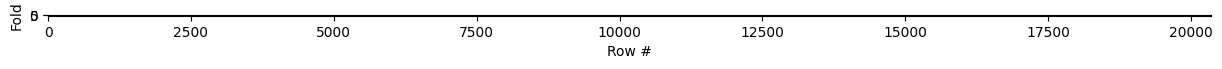

In [144]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
limit = 50
i =0;
print(model_accuracies)
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
        if(i>limit):
            break
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), steel_inputs, steel_labels)

In [145]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': list(range(1, 10)),# Your Code Here ...
                  'max_features': list(range(1, 27))}# Your Code Here ... }

cross_validation = 100

grid_search = GridSearchCV( decision_tree_classifier, parameter_grid, cv=cross_validation
                            )

grid_search.fit(steel_inputs, steel_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Now let's visualize the grid search to see how the parameters interact.

q)	Visualize in a graphical manner the final decision tree achieved. 

Text(50.722222222222214, 0.5, 'max_depth')

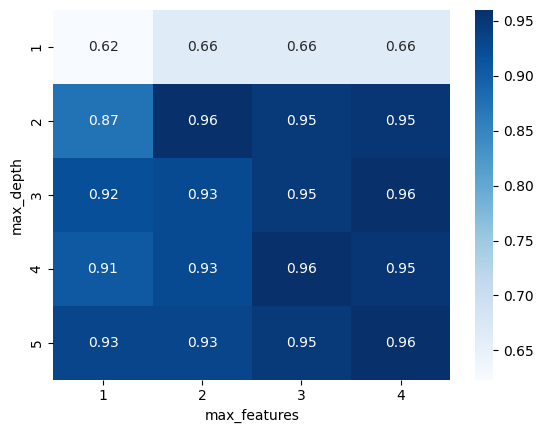

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision. `max_features` doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.) Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9733333333333334
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'splitter': 'best'}


Now we can take the best classifier from the Grid Search and use that:

In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=5, max_features=2)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [ ]:
import sklearn.tree as tree

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

<img src="iris_dtc.png" />

#### This time we chose **HistGradientBoosting** model:
This model benefits the dataset that have big amount of data (usually >= 10000), being more efficient and faster.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gradient_boosting_classifier = HistGradientBoostingClassifier(max_iter=100)
clf = hist_gradient_boosting_classifier.fit(training_inputs, training_classes)
score = clf.score(testing_inputs, testing_classes)
print(score)

0.812385600976205


As expected, the score of the model was increased by 10%.